<a href="https://colab.research.google.com/github/Mashhoodaliyusuf/Car-Price-Prediction/blob/main/CAR_PRICE_PREDICTION.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Car Price **Prediction**

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
data = pd.read_csv('/content/drive/MyDrive/assignment/Quikr_car.csv')

In [ ]:
data.shape

(1032, 10)

In [ ]:
data.head()

,Unnamed: 0,Name,Label,Location,Price,Kms_driven,Fuel_type,Owner,Year,Company
0,0,Ford Figo Duratec Petrol EXI 1.2 - 2015,PLATINUM,Bangalore,"₹3,80,000","35,056 kms",Petrol,NaN,2015,Ford
1,1,Maruti Suzuki Wagon R VXI BS IV - 2016,PLATINUM,Bangalore,"₹4,65,000","44,000 kms",Petrol,NaN,2016,Maruti
2,2,Hyundai Creta 1.6 SX PLUS AUTO PETROL - 2018,PLATINUM,Bangalore,"₹13,50,000","42,917 kms",Petrol,NaN,2018,Hyundai
3,3,Hyundai Venue - 2019,PLATINUM,Chennai,"₹10,19,699","16,112 kms",Petrol,2nd Owner,2019,Hyundai
4,4,Honda Jazz - 2017,PLATINUM,Pune,"₹7,13,499","30,988 kms",Petrol,2nd Owner,2017,Honda


In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1032 entries, 0 to 1031
Data columns (total 10 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Unnamed: 0  1032 non-null   int64 
 1   Name        1032 non-null   object
 2   Label       1032 non-null   object
 3   Location    1030 non-null   object
 4   Price       1032 non-null   object
 5   Kms_driven  1032 non-null   object
 6   Fuel_type   1032 non-null   object
 7   Owner       740 non-null    object
 8   Year        1032 non-null   int64 
 9   Company     1032 non-null   object
dtypes: int64(2), object(8)
memory usage: 80.8+ KB


In [ ]:
data.isnull().sum()

Unnamed: 0      0
Name            0
Label           0
Location        2
Price           0
Kms_driven      0
Fuel_type       0
Owner         292
Year            0
Company         0
dtype: int64

In [ ]:
#data[data['Kms_driven'].str.isnumeric()]

In [ ]:
data['Kms_driven'] = data['Kms_driven'].str.split(' ').str.get(0).str.replace(',' , '')

In [ ]:
data = data[data['Kms_driven'].str.isnumeric()]

In [ ]:
data['Kms_driven'] = data['Kms_driven'].astype(int)

In [ ]:
data['Price'] = data['Price'].str.split('₹').str.get(1).str.replace(',' , '')

In [ ]:
data = data[~data['Price'].isna()]

In [ ]:
data['Price'] = data['Price'].astype(int)

In [ ]:
data['Fuel_type'] = data['Fuel_type'].str.split('+').str.get(0).str.replace(' ' , '')

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1026 entries, 0 to 1031
Data columns (total 10 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Unnamed: 0  1026 non-null   int64 
 1   Name        1026 non-null   object
 2   Label       1026 non-null   object
 3   Location    1024 non-null   object
 4   Price       1026 non-null   int64 
 5   Kms_driven  1026 non-null   int64 
 6   Fuel_type   1026 non-null   object
 7   Owner       738 non-null    object
 8   Year        1026 non-null   int64 
 9   Company     1026 non-null   object
dtypes: int64(4), object(6)
memory usage: 88.2+ KB


In [ ]:
data['Name'] = data['Name'].str.split(' ').str.slice(0,3).str.join(' ')

In [ ]:
data

,Unnamed: 0,Name,Label,Location,Price,Kms_driven,Fuel_type,Owner,Year,Company
0,0,Ford Figo Duratec,PLATINUM,Bangalore,380000,35056,Petrol,NaN,2015,Ford
1,1,Maruti Suzuki Wagon,PLATINUM,Bangalore,465000,44000,Petrol,NaN,2016,Maruti
2,2,Hyundai Creta 1.6,PLATINUM,Bangalore,1350000,42917,Petrol,NaN,2018,Hyundai
3,3,Hyundai Venue -,PLATINUM,Chennai,1019699,16112,Petrol,2nd Owner,2019,Hyundai
4,4,Honda Jazz -,PLATINUM,Pune,713499,30988,Petrol,2nd Owner,2017,Honda
...,...,...,...,...,...,...,...,...,...,...
1027,1027,Hyundai i10 Magna,GOLD,Bangalore,229000,65000,Petrol,1st Owner,2014,Hyundai
1028,1028,Maruti Suzuki Alto,GOLD,Bangalore,275000,60000,Petrol,NaN,2014,Maruti
1029,1029,Jeep Compass Limited,GOLD,Mahasamund,1750000,31000,Diesel,1st Owner,2017,Jeep
1030,1030,Jeep Compass Limited,GOLD,Bilaspur,1750000,31000,Diesel,1st Owner,2017,Jeep


In [ ]:
data = data.reset_index(drop=True)

In [ ]:
data.drop(['Unnamed: 0','Label','Owner'],axis=1,inplace=True)

In [ ]:
data

,Name,Location,Price,Kms_driven,Fuel_type,Year,Company
0,Ford Figo Duratec,Bangalore,380000,35056,Petrol,2015,Ford
1,Maruti Suzuki Wagon,Bangalore,465000,44000,Petrol,2016,Maruti
2,Hyundai Creta 1.6,Bangalore,1350000,42917,Petrol,2018,Hyundai
3,Hyundai Venue -,Chennai,1019699,16112,Petrol,2019,Hyundai
4,Honda Jazz -,Pune,713499,30988,Petrol,2017,Honda
...,...,...,...,...,...,...,...
1021,Hyundai i10 Magna,Bangalore,229000,65000,Petrol,2014,Hyundai
1022,Maruti Suzuki Alto,Bangalore,275000,60000,Petrol,2014,Maruti
1023,Jeep Compass Limited,Mahasamund,1750000,31000,Diesel,2017,Jeep
1024,Jeep Compass Limited,Bilaspur,1750000,31000,Diesel,2017,Jeep


In [ ]:
data.describe(include='all')

,Name,Location,Price,Kms_driven,Fuel_type,Year,Company
count,1026,1024,1.026000e+03,1026.000000,1026,1026.000000,1026
unique,230,39,NaN,NaN,6,NaN,25
top,Maruti Suzuki Alto,Pune,NaN,NaN,Petrol,NaN,Maruti
freq,78,323,NaN,NaN,726,NaN,383
mean,NaN,NaN,6.857131e+05,50299.542885,NaN,2015.809942,NaN
std,NaN,NaN,5.374755e+05,38143.114092,NaN,3.403289,NaN
min,NaN,NaN,3.900000e+04,0.000000,NaN,2000.000000,NaN
25%,NaN,NaN,4.104990e+05,26228.750000,NaN,2014.000000,NaN
50%,NaN,NaN,5.576990e+05,44000.000000,NaN,2016.000000,NaN
75%,NaN,NaN,7.885990e+05,67551.000000,NaN,2018.000000,NaN


In [ ]:
#outliers Have to remove this to maintain accuracy
data[data['Price']>7e6]

,Name,Location,Price,Kms_driven,Fuel_type,Year,Company
713,Mercedes Benz GLE,Mumbai,7500000,35000,Petrol,2019,Mercedes


In [ ]:
#removing outliers
data = data[data['Price']<7e6].reset_index(drop=True)

In [ ]:
data

,Name,Location,Price,Kms_driven,Fuel_type,Year,Company
0,Ford Figo Duratec,Bangalore,380000,35056,Petrol,2015,Ford
1,Maruti Suzuki Wagon,Bangalore,465000,44000,Petrol,2016,Maruti
2,Hyundai Creta 1.6,Bangalore,1350000,42917,Petrol,2018,Hyundai
3,Hyundai Venue -,Chennai,1019699,16112,Petrol,2019,Hyundai
4,Honda Jazz -,Pune,713499,30988,Petrol,2017,Honda
...,...,...,...,...,...,...,...
1020,Hyundai i10 Magna,Bangalore,229000,65000,Petrol,2014,Hyundai
1021,Maruti Suzuki Alto,Bangalore,275000,60000,Petrol,2014,Maruti
1022,Jeep Compass Limited,Mahasamund,1750000,31000,Diesel,2017,Jeep
1023,Jeep Compass Limited,Bilaspur,1750000,31000,Diesel,2017,Jeep


# Correlation of **columns**

In [ ]:
matrix = data.corr().round(2)
matrix

,Price,Kms_driven,Year
Price,1.0,-0.1,0.4
Kms_driven,-0.1,1.0,-0.5
Year,0.4,-0.5,1.0


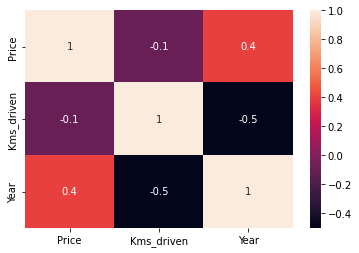

In [ ]:
import seaborn as sns
sns.heatmap(matrix, annot=True)
plt.show()

# Model

In [ ]:
X = data[['Name','Location','Kms_driven','Fuel_type','Year','Company']]
y = data['Price']

In [ ]:
X

,Name,Location,Kms_driven,Fuel_type,Year,Company
0,Ford Figo Duratec,Bangalore,35056,Petrol,2015,Ford
1,Maruti Suzuki Wagon,Bangalore,44000,Petrol,2016,Maruti
2,Hyundai Creta 1.6,Bangalore,42917,Petrol,2018,Hyundai
3,Hyundai Venue -,Chennai,16112,Petrol,2019,Hyundai
4,Honda Jazz -,Pune,30988,Petrol,2017,Honda
...,...,...,...,...,...,...
1020,Hyundai i10 Magna,Bangalore,65000,Petrol,2014,Hyundai
1021,Maruti Suzuki Alto,Bangalore,60000,Petrol,2014,Maruti
1022,Jeep Compass Limited,Mahasamund,31000,Diesel,2017,Jeep
1023,Jeep Compass Limited,Bilaspur,31000,Diesel,2017,Jeep


In [ ]:
X.to_csv('clean_data.csv')

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

In [ ]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import make_column_transformer
from sklearn.pipeline import make_pipeline

In [ ]:
ohe = OneHotEncoder()
ohe.fit(X[['Name','Location','Fuel_type','Company']])

OneHotEncoder()

In [ ]:
column_trans = make_column_transformer((OneHotEncoder(categories=ohe.categories_),['Name','Location','Fuel_type','Company']), remainder='passthrough')

In [ ]:
lr =LinearRegression()

In [ ]:
pipe = make_pipeline(column_trans,lr)

In [ ]:
pipe.fit(X_train,y_train)

Pipeline(steps=[('columntransformer',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('onehotencoder',
                                                  OneHotEncoder(categories=[array(['Audi Q3 -', 'Audi Q5 2.0', 'Audi Q7 3.0', 'Audi Q7 35',
       'BMW 3 Series', 'BMW 5 Series', 'BMW X5 xDrive30d',
       'Chevrolet Aveo -', 'Chevrolet Beat -', 'Chevrolet Beat LS',
       'Chevrolet Beat LT', 'Chevrolet Cruze LTZ', 'Chevrolet Optra -',
       'Chevrolet S...
                                                                            array(['CNG', 'Diesel', 'Electric', 'Hybrid', 'LPG', 'Petrol'],
      dtype=object),
                                                                            array(['Audi', 'BMW', 'Chevrolet', 'Datsun', 'Fiat', 'Ford', 'Honda',
       'Hyundai', 'Jaguar', 'Jeep', 'Kia', 'Land', 'MG', 'Mahindra',
       'Maruti', 'Mercedes', 'Nissan', 'Porsche', 'Renault', 'Skoda',
       'Ssangyong', 'Tata',

In [ ]:
y_predict = pipe.predict(X_test)

In [ ]:
r2_score(y_test,y_predict)

0.6184273834216979

In [ ]:
scores=[]
for i in range(1000):
  X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=i)
  lr = LinearRegression()
  pipe = make_pipeline(column_trans,lr)
  pipe.fit(X_train,y_train)
  y_predict = pipe.predict(X_test)
  scores.append(r2_score(y_test,y_predict))

In [ ]:
np.argmax(scores)

324

In [ ]:
scores[np.argmax(scores)]

0.8603488078335065

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=np.argmax(scores))
lr = LinearRegression()
pipe = make_pipeline(column_trans,lr)
pipe.fit(X_train,y_train)
y_predict = pipe.predict(X_test)
r2_score(y_test,y_predict)

0.8603488078335065

In [ ]:
import pickle
#import joblib

In [ ]:
pickle.dump(lr, open('LineModel.P','wb'))
#joblib.dump(pipe , 'model_jlib')

In [ ]:
pipe.predict(pd.DataFrame([['Jeep Compass Limited', 'Bilaspur', 30000 , 'Petrol', 2017, 'Jeep']],columns=['Name','Location','Kms_driven','Fuel_type','Year','Company']))

array([1711209.67487779])

In [ ]:
pip freeze > requirements.txt

In [ ]:
#from sklearn.ensemble import RandomForestRegressor
#rfr = RandomForestRegressor()


In [ ]:
#pipe2 = make_pipeline(column_trans,rfr)

In [ ]:
#pipe2.fit(X_train,y_train)

In [ ]:
#y2_predict = pipe2.predict(X_test)

In [ ]:
#r2_score(y_test,y_predict)

In [ ]:
#scores2=[]
#for i in range(300):
  #X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=i)
  #rfr = RandomForestRegressor()
  #pipe2 = make_pipeline(column_trans,rfr)
  #pipe2.fit(X_train,y_train)
  #y_predict = pipe2.predict(X_test)
  #scores2.append(r2_score(y_test,y_predict))

In [ ]:
#np.argmax(scores2)

In [ ]:
#scores2[np.argmax(scores2)]

In [ ]:
#pipe2.predict(pd.DataFrame([['Jeep Compass Limited', 'Bilaspur', 30000 , 'Petrol', 2017, 'Jeep']],columns=['Name','Location','Kms_driven','Fuel_type','Year','Company']))

In [ ]:
import xgboost
xgb_reg = xgboost.XGBRegressor()

In [ ]:
pipe3 = make_pipeline(column_trans,xgb_reg)

In [ ]:
pipe3.fit(X_train,y_train)

[04:35:04] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


Pipeline(steps=[('columntransformer',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('onehotencoder',
                                                  OneHotEncoder(categories=[array(['Audi Q3 -', 'Audi Q5 2.0', 'Audi Q7 3.0', 'Audi Q7 35',
       'BMW 3 Series', 'BMW 5 Series', 'BMW X5 xDrive30d',
       'Chevrolet Aveo -', 'Chevrolet Beat -', 'Chevrolet Beat LS',
       'Chevrolet Beat LT', 'Chevrolet Cruze LTZ', 'Chevrolet Optra -',
       'Chevrolet S...
                                                                            array(['CNG', 'Diesel', 'Electric', 'Hybrid', 'LPG', 'Petrol'],
      dtype=object),
                                                                            array(['Audi', 'BMW', 'Chevrolet', 'Datsun', 'Fiat', 'Ford', 'Honda',
       'Hyundai', 'Jaguar', 'Jeep', 'Kia', 'Land', 'MG', 'Mahindra',
       'Maruti', 'Mercedes', 'Nissan', 'Porsche', 'Renault', 'Skoda',
       'Ssangyong', 'Tata',

In [ ]:
y2_predict = pipe3.predict(X_test)

In [ ]:
r2_score(y_test,y_predict)

-0.2981120896826439

In [ ]:
scores3=[]
for i in range(100):
  X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=i)
  xgb_reg = xgboost.XGBRegressor()
  pipe3 = make_pipeline(column_trans,xgb_reg)
  pipe3.fit(X_train,y_train)
  y_predict = pipe3.predict(X_test)
  scores3.append(r2_score(y_test,y_predict))

[04:35:24] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[04:35:24] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[04:35:25] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[04:35:25] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[04:35:25] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[04:35:25] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[04:35:25] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[04:35:25] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of re

In [ ]:
np.argmax(scores3)

80

In [ ]:
scores3[np.argmax(scores3)]

0.7044166590191915

In [ ]:
pipe3.predict(pd.DataFrame([['Jeep Compass Limited', 'Bilaspur', 30000 , 'Petrol', 2017, 'Jeep']],columns=['Name','Location','Kms_driven','Fuel_type','Year','Company']))

array([1233987.], dtype=float32)

**Quality issue**

    Price has rupee symbol and comma and also in object format. WE have to convert it into int format
    Kms_driven has kms symbol and comma and also in object format rather than in int format
    Fuel_type replace Petrol + CNG with Hybrid
